<a href="https://colab.research.google.com/github/anshkumar/elf/blob/master/NSMOCS_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "./drive/My Drive/data.zip" .

In [0]:
!unzip ./data.zip

Archive:  ./data.zip
   creating: data/
   creating: data/VIC/
  inflating: data/VIC/PRICE_AND_DEMAND_201501_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201711_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201710_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201612_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201706_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201707_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201604_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201605_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201510_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201511_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201701_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201609_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201608_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201603_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201602_VIC1.csv  
  inflating: data/VIC/PRICE_AND_DEMAND_201507_VIC1.csv  
  inflating: data/VIC/PRI

In [0]:
class sw(object):

    def __init__(self):

        self.__Positions = []
        self.__Gbest = []

    def _set_Gbest(self, Gbest):
        self.__Gbest = Gbest

    def _points(self, agents):
        self.__Positions.append([list(i) for i in agents])

    def get_agents(self):
        """Returns a history of all agents of the algorithm (return type:
        list)"""

        return self.__Positions

    def get_Gbest(self):
        """Return the best position of algorithm (return type: list)"""

        return list(self.__Gbest)


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 25 15:16:25 2018

@author: vedanshu
"""

import numpy as np
from math import gamma, pi, sin, sqrt
from random import normalvariate, randint, random

class QuadraticCost(object):
    @staticmethod
    def fn(a,y):
        return 0.5*np.linalg.norm(a-y)**2
        
    @staticmethod
    def delta(activation, z, a, y):
        if(activation == Activation.sigmoid):
            return (a-y)*Activation.sigmoid_prime(z)
        elif(activation == Activation.tanh):
            return (a-y)*Activation.tanh_prime(z)
        elif(activation == Activation.relu):
            return (a-y)*(z > 0)
        
class Accuracy(object):
    @staticmethod
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    @staticmethod
    def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_true - y_pred))) 
 
    @staticmethod
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

class CrossEntropyCost(object):
    @staticmethod
    def fn(a, y):
        a[a == 0] = 1e-10
        return np.sum(np.nan_to_num(-y*np.log(a) - (1-y)*np.log(1-a)))
    
    @staticmethod
    def delta(activation, z, a, y):
        if(activation == Activation.sigmoid):
            return a-y
        else:
            return (a - y + 1 - y/a)
        
class Activation(object):
    @staticmethod
    def sigmoid(z):
        return 1.0/(1.0 + np.exp(-z))
    
    @staticmethod
    def sigmoid_prime(z):
        return Activation.sigmoid(z)*(1 - Activation.sigmoid(z))

    @staticmethod        
    def tanh(z):
        return 2*Activation.sigmoid(2*z) - 1
    
    @staticmethod        
    def tanh_prime(z):
        return 1 - (Activation.tanh(z))**2
        
    @staticmethod
    def relu(z):
        return z * (z > 0)

class Network(sw):
    def __init__(self, sizes, activate, cost = CrossEntropyCost):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.default_weight_initializer()
        self.cost = cost
        self.activate = activate
        self.dim = sum(x*(y+1) for x,y in zip(self.sizes[1:], self.sizes[:-1]))
               
    def default_weight_initializer(self):
        self.biases = [np.random.randn(x,1) for x in self.sizes[1:]]
        self.weights = [np.random.randn(x,y)/np.sqrt(x) 
                        for x,y in zip(self.sizes[1:], self.sizes[:-1])]
    
    def large_weight_initializer(self):
        self.biases = [np.random.randn(x,1) for x in self.sizes[1:]]
        self.weights = [np.random.randn(x,y) 
                        for x,y in zip(self.sizes[1:], self.sizes[:-1])]
    
    def feedforward(self,a):
        for b,w in zip(self.biases, self.weights):
            a  = (self.activate)(np.matmul(w,a) + b)
        return a
                
    def set_weight_bias(self, a):
        lIt = 0
        rIt = 0
        self.weights = []
        self.biases = []
        for x,y in zip(self.sizes[1:], self.sizes[:-1]):
            rIt += x*y
            self.weights.append(a[lIt:rIt].reshape((x,y)))
            lIt = rIt
        for x in self.sizes[1:]:
            rIt += x
            self.biases.append(a[lIt:rIt].reshape((x,1)))
            lIt = rIt
           
    def SGD(self, train_x, train_y, epochs, mini_batch_size, eta,
            evaluation_x = None, evaluation_y = None, lmbda = 0.0,
            monitor_evaluation_cost = False,
            monitor_evaluation_accuracy = False,
            monitor_training_cost = False,
            monitor_training_accuracy = False,
            output2D = False):
   
        evaluation_cost, eval_mape, eval_rmse, eval_mae = [], [] , [] , []
        training_cost, training_mape, training_rmse, training_mae = [], [] , [] , []
        n_train = train_x.shape[1]
        for i in range(epochs): 
            for j in range(0, int(n_train/mini_batch_size)):
                #taking transpose below in very much important
                X = train_x[:,j*mini_batch_size:(j+1)*mini_batch_size]
                if output2D:
                    y = train_y[:, j*mini_batch_size:(j+1)*mini_batch_size]
                else:
                    y = train_y[j*mini_batch_size:(j+1)*mini_batch_size]
                self.update_mini_batch(X, y, mini_batch_size, eta, lmbda, train_x.shape[1])
                               
            if i % 100 == 0:
                print("Epochs {0}".format(i))
            if monitor_training_cost:
                cost = self.total_cost(train_x, train_y, lmbda, output2D)
                training_cost.append(cost)
                if i % 100 == 0:
                    print("Cost on training data: {1}".format(i, cost))
            if monitor_training_accuracy:
                accuracy = self.accuracy(train_x, train_y, output2D, Accuracy.mape)
                training_mape.append(accuracy)
                if i % 100 == 0:
                    print("MAPE on training data: {0}".format(accuracy))
                    
                accuracy = self.accuracy(train_x, train_y, output2D, Accuracy.rmse)
                training_rmse.append(accuracy)
                if i % 100 == 0:
                    print("RMSE on training data: {0}".format(accuracy))
                    
                accuracy = self.accuracy(train_x, train_y, output2D, Accuracy.mae)
                training_mae.append(accuracy)
                if i % 100 == 0:
                    print("MAE on training data: {0}".format(accuracy))
            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_x, evaluation_y, lmbda, output2D)
                evaluation_cost.append(cost)
                if i % 100 == 0:
                    print("Cost on evaluation data: {1}".format(i, cost))
            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_x, evaluation_y, output2D, Accuracy.mape)
                eval_mape.append(accuracy)
                if i % 100 == 0:
                    print("MAPE on evaluation data: {0}".format(accuracy)) 
                    
                accuracy = self.accuracy(evaluation_x, evaluation_y, output2D, Accuracy.rmse)
                eval_rmse.append(accuracy)
                if i % 100 == 0:
                    print("RMSE on evaluation data: {0}".format(accuracy)) 
                    
                accuracy = self.accuracy(evaluation_x, evaluation_y, output2D, Accuracy.mae)
                eval_mae.append(accuracy)
                if i % 100 == 0:
                    print("MAE on evaluation data: {0}".format(accuracy)) 
        return evaluation_cost, eval_mape, eval_rmse, eval_mae, training_cost, training_mape, training_rmse, training_mae
    
    def update_mini_batch(self, X, y, mini_batch_size, eta, lmbda, n):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        delta_nabla_b, delta_nabla_w = self.backprop(X, y, mini_batch_size)
        nabla_b = [nb+dnb for nb,dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.biases = [b - (eta/mini_batch_size)*nb 
                            for b,nb in zip(self.biases, nabla_b)]


#       L2 regulrization        
#        self.weights = [(1 - eta*(lmbda/n))*w - (eta/mini_batch_size)*nw 
#                            for w,nw in zip(self.weights, nabla_w)]

#       L1 regulrization
        self.weights = [(w - eta*(lmbda/n)*np.sign(w)) - (eta/mini_batch_size)*nw 
                            for w,nw in zip(self.weights, nabla_w)]
                            
    def backprop(self, X, y, mini_batch_size):
        activations = [X]
        z = []
        delta = [np.zeros((x, mini_batch_size)) 
                        for x in self.sizes[1:]]
        delta_nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for b,w in zip(self.biases, self.weights):
            z.append(np.matmul(w,activations[-1]) + b)
            activations.append((self.activate)(z[-1]))
           
        delta[-1] = (self.cost).delta(self.activate, z[-1], activations[-1], y)
        delta_nabla_w[-1] = np.dot(delta[-1], activations[-2].transpose())
                        
        for l in range(2,self.num_layers):
            delta[-l] = np.dot(self.weights[-l + 1].transpose(), 
                                        delta[-l+1])*\
                                        (self.activate)(z[-l])
            delta_nabla_w[-l] = np.dot(delta[-l], 
                                        activations[-l-1].transpose())
        
        delta_nabla_b = [b.sum(axis = 1).reshape((b.shape[0], 1)) 
                        for b in delta]
        return (delta_nabla_b, delta_nabla_w)
        
    def accuracy(self, X, Y, output2D = False, AccFunc = Accuracy.mape):
        if not output2D:
            results = np.zeros(X.shape[1])
            for i in range(0, X.shape[1]):
                x = X[:, i]
                x = x.reshape((x.shape[0], 1))    #Very much important           
                results[i] = self.feedforward(x).item(0)
            return AccFunc(Y, results)
        else:
            results = []
            for i in range(0, X.shape[1]):
                x = X[:, i]
                x = x.reshape((x.shape[0], 1))    #Very much important           
                results.append(self.feedforward(x))
            return AccFunc(Y, np.hstack(results))
        
    def total_cost(self, X, Y, lmbda, output2D = False):
        cost = 0.0
        for j in range(0, int(X.shape[1])):
            x = X[:, j]
            if output2D:
                y = Y[:,j]
            else:
                y = Y[j]
            x = x.reshape((x.shape[0], 1))    #Very much important   
            a = self.feedforward(x)
            cost += self.cost.fn(a,y)/Y.shape[0]
        cost += 0.5*(lmbda/Y.shape[0])*sum(np.linalg.norm(w)**2 for w in self.weights)
        return cost     
        
    """
    Cuckoo Search Optimization
    """

    def multiObjectiveFunction(self,x):
        self.set_weight_bias(x)
        y_prime = self.feedforward(self.input)
        ob1 = sum(abs(u-v) for u,v in zip(y_prime, self.output))/x.shape[0]
        ob2 = sqrt(sum((u-v)**2 for u,v in zip(y_prime, self.output))/x.shape[0])
        ob3 = sum(abs((u-v)/v) for u,v in zip(y_prime, self.output))/x.shape[0]
        ob4 = sqrt(sum((abs((u-v)/v) - ob3)**2 for u,v in zip(y_prime, self.output))/x.shape[0])
        return min([ob1,ob2,ob3,ob4])
    
    def cso(self, n, x, y, function, lb, ub, dimension, iteration, pa=0.25,
                 nest=100):
        """
        :param n: number of agents
        :param function: test function
        :param lb: lower limits for plot axes
        :param ub: upper limits for plot axes
        :param dimension: space dimension
        :param iteration: number of iterations
        :param pa: probability of cuckoo's egg detection (default value is 0.25)
        :param nest: number of nests (default value is 100)
        """

        super(Network, self).__init__()

        self.__Nests = []
        
        self.input = x
        self.output = y

        beta = 3 / 2
        sigma = (gamma(1 + beta) * sin(pi * beta / 2) / (
            gamma((1 + beta) / 2) * beta *
            2 ** ((beta - 1) / 2))) ** (1 / beta)
        u = np.array([normalvariate(0, 1) for k in range(dimension)]) * sigma
        v = np.array([normalvariate(0, 1) for k in range(dimension)])
        step = u / abs(v) ** (1 / beta)

        self.__agents = np.random.uniform(lb, ub, (n, dimension))
        self.__nests = np.random.uniform(lb, ub, (nest, dimension))
        Pbest = self.__nests[np.array([function(x)
                                       for x in self.__nests]).argmin()]
        Gbest = Pbest
        self._points(self.__agents)

        for t in range(iteration):

            for i in self.__agents:
                val = randint(0, nest - 1)
                if function(i) < function(self.__nests[val]):
                    self.__nests[val] = i

            fnests = [(function(self.__nests[i]), i) for i in range(nest)]
            fnests.sort()
            fcuckoos = [(function(self.__agents[i]), i) for i in range(n)]
            fcuckoos.sort(reverse=True)

            nworst = nest // 2
            worst_nests = [fnests[-i - 1][1] for i in range(nworst)]

            for i in worst_nests:
                if random() < pa:
                    self.__nests[i] = np.random.uniform(lb, ub, (1, dimension))

            if nest > n:
                mworst = n
            else:
                mworst = nest

            for i in range(mworst):

                if fnests[i][0] < fcuckoos[i][0]:
                    self.__agents[fcuckoos[i][1]] = self.__nests[fnests[i][1]]

            self.__nests = np.clip(self.__nests, lb, ub)
            self.__Levyfly(step, Pbest, n, dimension)
            self.__agents = np.clip(self.__agents, lb, ub)
            self._points(self.__agents)
            self.__nest()

            Pbest = self.__nests[np.array([function(x)
                                        for x in self.__nests]).argmin()]

            if function(Pbest) < function(Gbest):
                Gbest = Pbest

        self._set_Gbest(Gbest)

    def __nest(self):
        self.__Nests.append([list(i) for i in self.__nests])

    def __Levyfly(self, step, Pbest, n, dimension):

        for i in range(n):
            stepsize = 0.2 * step * (self.__agents[i] - Pbest)
            self.__agents[i] += stepsize * np.array([normalvariate(0, 1)
                                                    for k in range(dimension)])

    def get_nests(self):
        """Return a history of cuckoos nests (return type: list)"""

        return self.__Nests
    


In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 17 21:30:36 2018

@author: vedanshu
"""

"""
overfitting
~~~~~~~~~~~
Plot graphs to illustrate the problem of overfitting.  
"""

# Standard library
import json

# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from os import path

def make_plots(filename, num_epochs, 
               training_cost_xmin=200, 
               test_accuracy_xmin=200, 
               test_cost_xmin=0, 
               training_accuracy_xmin=0,
               plt_training_cost = False,
               plt_training_accuracy = False,
               plt_test_cost = False,
               plt_test_accuracy = True,
               plt_overlay = False):
    """Load the results from ``filename``, and generate the corresponding
    plots. """
    f = open(filename, "r")
    test_cost, test_mape, test_rmse, test_mae, training_cost, training_mape, \
        training_rmse, training_mae = json.load(f)
    f.close()
    if plt_training_cost:
        plot_training_cost(training_cost, num_epochs, training_cost_xmin)
    if plt_test_accuracy:
        plot_test_accuracy(test_mape, num_epochs, test_accuracy_xmin)
    if plt_test_cost:
        plot_test_cost(test_cost, num_epochs, test_cost_xmin)
    if plt_training_accuracy:
        plot_training_accuracy(training_mape, num_epochs, 
                               training_accuracy_xmin)
    if plt_overlay:
        plot_overlay(test_mape, training_mape, num_epochs,
                 min(test_accuracy_xmin, training_accuracy_xmin))

def plot_training_cost(training_cost, num_epochs, training_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_cost_xmin, num_epochs), 
            training_cost[training_cost_xmin:num_epochs],
            color='#2A6EA6')
    ax.set_xlim([training_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the training data')
    plt.show()

def plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([test_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Error on the test data')
    plt.show()

def plot_test_cost(test_cost, num_epochs, test_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_cost_xmin, num_epochs), 
            test_cost[test_cost_xmin:num_epochs],
            color='#2A6EA6')
    ax.set_xlim([test_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the test data')
    plt.show()

def plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([training_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Error on the training data')
    plt.show()

def plot_overlay(test_accuracy, training_accuracy, num_epochs, xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy for accuracy in test_accuracy], 
            color='#2A6EA6',
            label="Error on the test data")
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy 
             for accuracy in training_accuracy], 
            color='#FFA933',
            label="Error on the training data")
    ax.grid(True)
    ax.set_xlim([xmin, num_epochs])
    ax.set_xlabel('Epoch')
    ax.set_ylim([0, 20])
    plt.legend(loc="lower right")
    plt.show()

def timeSeriesSplit(cso = False):
    state = {0: 'NSW', 1: 'QLD', 2: 'SA', 3: 'TAS', 4: 'VIC'}
    year = {0: '2015', 1: '2016', 2: '2017'}
    
    df_nsw = pd.DataFrame()
    df_qld = pd.DataFrame()
    df_sa = pd.DataFrame()
    df_tas = pd.DataFrame()
    df_vic = pd.DataFrame()
    
    df = {'NSW': df_nsw, 'QLD': df_qld, 'SA': df_sa, 'TAS': df_tas, 'VIC': df_vic}
    
    df_nsw_test = pd.DataFrame()
    df_qld_test = pd.DataFrame()
    df_sa_test = pd.DataFrame()
    df_tas_test = pd.DataFrame()
    df_vic_test = pd.DataFrame()
    
    df_test = {'NSW': df_nsw_test, 'QLD': df_qld_test, 'SA': df_sa_test, 'TAS': df_tas_test, 'VIC': df_vic_test}
    
    for st in state.values():
        for ye in year.values():
            for mn in range(1,13):
                if mn < 10:            
                    dataset = pd.read_csv('./datasets/train/' + st + '/PRICE_AND_DEMAND_' + ye + '0' + str(mn) +'_' + st + '1.csv')
                else:
                    dataset = pd.read_csv('./datasets/train/' + st + '/PRICE_AND_DEMAND_' + ye + str(mn) +'_' + st + '1.csv')
                df[st] = df[st].append(dataset.iloc[:,1:3])
        df[st] = df[st].set_index('SETTLEMENTDATE')
       
    for st in state.values():
        dataset = pd.read_csv('./datasets/test/' + st + '/PRICE_AND_DEMAND_201801_' + st + '1.csv')
        df_test[st] = df_test[st].append(dataset.iloc[:,1:3])
        df_test[st] = df_test[st].set_index('SETTLEMENTDATE')
       
    # numpy array
    list_hourly_load_NSW = np.array(df['NSW'])
    list_hourly_load_QLD = np.array(df['QLD'])
    list_hourly_load_SA = np.array(df['SA'])
    list_hourly_load_TAS = np.array(df['TAS'])
    list_hourly_load_VIC = np.array(df['VIC'])
       
    # the length of the sequnce for predicting the future value
    sequence_length = 84
    x_size = 36
    hidden = 10
    y_size = 48
    
    # normalizing
    matrix_load_NSW = list_hourly_load_NSW / np.linalg.norm(list_hourly_load_NSW)
    matrix_load_QLD = list_hourly_load_QLD / np.linalg.norm(list_hourly_load_QLD)
    matrix_load_SA = list_hourly_load_SA / np.linalg.norm(list_hourly_load_SA)
    matrix_load_TAS = list_hourly_load_TAS / np.linalg.norm(list_hourly_load_TAS)
    matrix_load_VIC = list_hourly_load_VIC / np.linalg.norm(list_hourly_load_VIC)
    
    matrix_load_NSW = matrix_load_NSW[:-(len(matrix_load_NSW) % sequence_length)]
    matrix_load_QLD = matrix_load_QLD[:-(len(matrix_load_QLD) % sequence_length)]
    matrix_load_SA = matrix_load_SA[:-(len(matrix_load_SA) % sequence_length)]
    matrix_load_TAS = matrix_load_TAS[:-(len(matrix_load_TAS) % sequence_length)]
    matrix_load_VIC = matrix_load_VIC[:-(len(matrix_load_VIC) % sequence_length)]
    
    matrix_load_NSW = matrix_load_NSW.reshape(-1, sequence_length)
    matrix_load_QLD = matrix_load_QLD.reshape(-1, sequence_length)
    matrix_load_SA = matrix_load_SA.reshape(-1, sequence_length)
    matrix_load_TAS = matrix_load_TAS.reshape(-1, sequence_length)
    matrix_load_VIC = matrix_load_VIC.reshape(-1, sequence_length)
    
    # shuffle the training set (but do not shuffle the test set)
    np.random.shuffle(matrix_load_NSW)
    np.random.shuffle(matrix_load_QLD)
    np.random.shuffle(matrix_load_SA)
    np.random.shuffle(matrix_load_TAS)
    np.random.shuffle(matrix_load_VIC)
    
    # the training set
    X_NSW = matrix_load_NSW[:, :x_size]
    X_QLD = matrix_load_QLD[:, :x_size]
    X_SA = matrix_load_SA[:, :x_size]
    X_TAS = matrix_load_TAS[:, :x_size]
    X_VIC = matrix_load_VIC[:, :x_size]
    
    # the last column is the true value to compute the mean-squared-error loss
    y_NSW = matrix_load_NSW[:, x_size:]
    y_QLD = matrix_load_QLD[:, x_size:]
    y_SA = matrix_load_SA[:, x_size:]
    y_TAS = matrix_load_TAS[:, x_size:]
    y_VIC = matrix_load_VIC[:, x_size:]
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    X = {'NSW': X_NSW, 'QLD': X_QLD, 'SA': X_SA, 'TAS': X_TAS, 'VIC': X_VIC}
    y = {'NSW': y_NSW, 'QLD': y_QLD, 'SA': y_SA, 'TAS': y_TAS, 'VIC': y_VIC}
    
    for st in state.values():
        print("State: ", st)
        i = 1
        for train_index, test_index in tscv.split(X[st]):
            X_train, X_test = X[st][train_index], X[st][test_index]
            y_train, y_test = y[st][train_index], y[st][test_index]
            
            print("Train and validation from state ", st, " split ", i)
            net = nt.Network([x_size, hidden, y_size], nt.Activation.tanh, nt.QuadraticCost)
            if cso:
                fname = "kernelBiasTimeSeries" + st + ".npy"
                if not path.exists(fname):
                    print("Weights and biases initialization for state ",st, " in progress...")
                    randInt = np.random.randint(X_train.shape[0])
                    net.cso(100,X_train[randInt].reshape(x_size,1),y_train[randInt].reshape(y_size,1),
                                net.multiObjectiveFunction,-0.6,0.6,net.dim ,100)
                    net.set_weight_bias(np.array(net.get_Gbest()))
                    np.save(fname, np.array(net.get_Gbest()))
                net.set_weight_bias(np.load(fname))

            if cso:
                fname = "results_" + st + "_TS_" + str(i) + "CSO"
            else:
                fname = "results_" + st + "_TS_" + str(i) + "GD"
            num_epochs = 1500
            lmbda = 2
            
            evaluation_cost, eval_mape, eval_rmse, eval_mae, training_cost, training_mape, training_rmse, training_mae = net.SGD(
                    X_train.transpose(),y_train.transpose(), num_epochs, 
                    10, 0.01, 
                    X_test.transpose(), y_test.transpose(), 
                    lmbda, monitor_evaluation_cost = True,
                    monitor_evaluation_accuracy = True,
                    monitor_training_cost = True,
                    monitor_training_accuracy = True,
                    output2D = True)
            
            f = open(fname, "w")
            json.dump([evaluation_cost, eval_mape, eval_rmse, eval_mae, training_cost, training_mape, training_rmse, training_mae], f)
            f.close()
                
#            make_plots(fname, num_epochs,
#                       training_cost_xmin = 0,
#                       test_accuracy_xmin = 0,
#                       test_cost_xmin = 0, 
#                       training_accuracy_xmin = 0)
            i = i+1

def fiveFoldCrossValidation(cso = False):
    #State and year to use for training and testing
    state = {0: 'NSW', 1: 'QLD', 2: 'SA', 3: 'TAS', 4: 'VIC'}
#    state = {0: 'NSW'}
    year = {0: '2015', 1: '2016', 2: '2017'}
#    year = {0: '2015'}
    
    hidden = 10
    
    #Training and testing batches
    x_batches = {}
    y_batches = {} 
    
    #parameters for 5 fold validation 
    set_size = 84 
    x_size = 36
    y_size = 48
    x_batches_validation_fold ={}
    y_batches_validation_fold ={}
    x_batches_train_fold = {}
    y_batches_train_fold = {}

    df_nsw = pd.DataFrame()
    df_qld = pd.DataFrame()
    df_sa = pd.DataFrame()
    df_tas = pd.DataFrame()
    df_vic = pd.DataFrame()
    
    df = {'NSW': df_nsw, 'QLD': df_qld, 'SA': df_sa, 'TAS': df_tas, 'VIC': df_vic}
    
    for st in state.values():
        for ye in year.values():
            for mn in range(1,13):
                if mn < 10:            
                    dataset = pd.read_csv('./data/' + st + '/PRICE_AND_DEMAND_' + ye + '0' + str(mn) +'_' + st + '1.csv')
                else:
                    dataset = pd.read_csv('./data/' + st + '/PRICE_AND_DEMAND_' + ye + str(mn) +'_' + st + '1.csv')
                df[st] = df[st].append(dataset.iloc[:,1:3])
        df[st] = df[st].set_index('SETTLEMENTDATE')
    
    TS_NSW = np.array(df['NSW'])
    TS_QLD = np.array(df['QLD'])
    TS_SA = np.array(df['SA'])
    TS_TAS = np.array(df['TAS'])
    TS_VIC = np.array(df['VIC'])
      
    #Normalizing the dataset
    TS_NSW = TS_NSW / np.linalg.norm(TS_NSW)
    TS_QLD = TS_QLD / np.linalg.norm(TS_QLD)
    TS_SA = TS_SA / np.linalg.norm(TS_SA)
    TS_TAS = TS_TAS / np.linalg.norm(TS_TAS)
    TS_VIC = TS_VIC / np.linalg.norm(TS_VIC)

    """ Making the dataset size divisible by num_period """
    TS_NSW = TS_NSW[:(len(TS_NSW) -(len(TS_NSW) % set_size))] 
    TS_QLD = TS_QLD[:(len(TS_QLD)- (len(TS_QLD) % set_size))]
    TS_SA = TS_SA[:(len(TS_SA) -(len(TS_SA) % set_size))]
    TS_TAS = TS_TAS[:(len(TS_TAS) -(len(TS_TAS) % set_size))]
    TS_VIC = TS_VIC[:(len(TS_VIC) - (len(TS_VIC) % set_size))] 
    
    """ Making our training dataset with batch size of num_period """
    TS_batches = {'NSW': TS_NSW.reshape(-1, set_size).transpose(),
                 'QLD': TS_QLD.reshape(-1, set_size).transpose(),
                 'SA': TS_SA.reshape(-1, set_size).transpose(),
                 'TAS': TS_TAS.reshape(-1, set_size).transpose(),
                 'VIC': TS_VIC.reshape(-1, set_size).transpose()}
    
    x_batches = {'NSW': TS_batches['NSW'][:x_size,:(TS_batches['NSW'].shape[1]-TS_batches['NSW'].shape[1]%5)],
                 'QLD': TS_batches['QLD'][:x_size,:(TS_batches['QLD'].shape[1]-TS_batches['QLD'].shape[1]%5)],
                 'SA': TS_batches['SA'][:x_size,:(TS_batches['SA'].shape[1]-TS_batches['SA'].shape[1]%5)],
                 'TAS': TS_batches['TAS'][:x_size,:(TS_batches['TAS'].shape[1]-TS_batches['TAS'].shape[1]%5)],
                 'VIC': TS_batches['VIC'][:x_size,:(TS_batches['VIC'].shape[1]-TS_batches['VIC'].shape[1]%5)]}
    
    y_batches = {'NSW': TS_batches['NSW'][x_size:,:(TS_batches['NSW'].shape[1]-TS_batches['NSW'].shape[1]%5)],
                 'QLD': TS_batches['QLD'][x_size:,:(TS_batches['QLD'].shape[1]-TS_batches['QLD'].shape[1]%5)],
                 'SA': TS_batches['SA'][x_size:,:(TS_batches['SA'].shape[1]-TS_batches['SA'].shape[1]%5)],
                 'TAS': TS_batches['TAS'][x_size:,:(TS_batches['TAS'].shape[1]-TS_batches['TAS'].shape[1]%5)],
                 'VIC': TS_batches['VIC'][x_size:,:(TS_batches['VIC'].shape[1]-TS_batches['VIC'].shape[1]%5)]}


    #Making validation set
    x_batches_validation_fold[1] = {'NSW': x_batches['NSW'][:, np.arange(0,x_batches['NSW'].shape[1],5)],
                             'QLD': x_batches['QLD'][:, np.arange(0,x_batches['QLD'].shape[1],5)],
                             'SA': x_batches['SA'][:, np.arange(0,x_batches['SA'].shape[1],5)],
                             'TAS': x_batches['TAS'][:, np.arange(0,x_batches['TAS'].shape[1],5)],
                             'VIC': x_batches['VIC'][:, np.arange(0,x_batches['VIC'].shape[1],5)]}
    
    x_batches_validation_fold[2] = {'NSW': x_batches['NSW'][:, np.arange(1,x_batches['NSW'].shape[1],5)],
                             'QLD': x_batches['QLD'][:, np.arange(1,x_batches['QLD'].shape[1],5)],
                             'SA': x_batches['SA'][:, np.arange(1,x_batches['SA'].shape[1],5)],
                             'TAS': x_batches['TAS'][:, np.arange(1,x_batches['TAS'].shape[1],5)],
                             'VIC': x_batches['VIC'][:, np.arange(1,x_batches['VIC'].shape[1],5)]}
    
    x_batches_validation_fold[3] = {'NSW': x_batches['NSW'][:, np.arange(2,x_batches['NSW'].shape[1],5)],
                             'QLD': x_batches['QLD'][:, np.arange(2,x_batches['QLD'].shape[1],5)],
                             'SA': x_batches['SA'][:, np.arange(2,x_batches['SA'].shape[1],5)],
                             'TAS': x_batches['TAS'][:, np.arange(2,x_batches['TAS'].shape[1],5)],
                             'VIC': x_batches['VIC'][:, np.arange(2,x_batches['VIC'].shape[1],5)]}
    
    x_batches_validation_fold[4] = {'NSW': x_batches['NSW'][:,np.arange(3,x_batches['NSW'].shape[1],5)],
                             'QLD': x_batches['QLD'][:, np.arange(3,x_batches['QLD'].shape[1],5)],
                             'SA': x_batches['SA'][:, np.arange(3,x_batches['SA'].shape[1],5)],
                             'TAS': x_batches['TAS'][:, np.arange(3,x_batches['TAS'].shape[1],5)],
                             'VIC': x_batches['VIC'][:, np.arange(3,x_batches['VIC'].shape[1],5)]}
    
    x_batches_validation_fold[5] = {'NSW': x_batches['NSW'][:, np.arange(4,x_batches['NSW'].shape[1],5)],
                             'QLD': x_batches['QLD'][:, np.arange(4,x_batches['QLD'].shape[1],5)],
                             'SA': x_batches['SA'][:, np.arange(4,x_batches['SA'].shape[1],5)],
                             'TAS': x_batches['TAS'][:, np.arange(4,x_batches['TAS'].shape[1],5)],
                             'VIC': x_batches['VIC'][:, np.arange(4,x_batches['VIC'].shape[1],5)]}
     
    y_batches_validation_fold[1] = {'NSW': y_batches['NSW'][:, np.arange(0,y_batches['NSW'].shape[1],5)],
                             'QLD': y_batches['QLD'][:, np.arange(0,y_batches['QLD'].shape[1],5)],
                             'SA': y_batches['SA'][:, np.arange(0,y_batches['SA'].shape[1],5)],
                             'TAS': y_batches['TAS'][:, np.arange(0,y_batches['TAS'].shape[1],5)],
                             'VIC': y_batches['VIC'][:, np.arange(0,y_batches['VIC'].shape[1],5)]}
    
    y_batches_validation_fold[2] = {'NSW': y_batches['NSW'][:, np.arange(1,y_batches['NSW'].shape[1],5)],
                             'QLD': y_batches['QLD'][:, np.arange(1,y_batches['QLD'].shape[1],5)],
                             'SA': y_batches['SA'][:, np.arange(1,y_batches['SA'].shape[1],5)],
                             'TAS': y_batches['TAS'][:, np.arange(1,y_batches['TAS'].shape[1],5)],
                             'VIC': y_batches['VIC'][:, np.arange(1,y_batches['VIC'].shape[1],5)]}
    
    y_batches_validation_fold[3] = {'NSW': y_batches['NSW'][:, np.arange(2,y_batches['NSW'].shape[1],5)],
                             'QLD': y_batches['QLD'][:, np.arange(2,y_batches['QLD'].shape[1],5)],
                             'SA': y_batches['SA'][:, np.arange(2,y_batches['SA'].shape[1],5)],
                             'TAS': y_batches['TAS'][:, np.arange(2,y_batches['TAS'].shape[1],5)],
                             'VIC': y_batches['VIC'][:, np.arange(2,y_batches['VIC'].shape[1],5)]}
    
    y_batches_validation_fold[4] = {'NSW': y_batches['NSW'][:, np.arange(3,y_batches['NSW'].shape[1],5)],
                             'QLD': y_batches['QLD'][:, np.arange(3,y_batches['QLD'].shape[1],5)],
                             'SA': y_batches['SA'][:, np.arange(3,y_batches['SA'].shape[1],5)],
                             'TAS': y_batches['TAS'][:, np.arange(3,y_batches['TAS'].shape[1],5)],
                             'VIC': y_batches['VIC'][:, np.arange(3,y_batches['VIC'].shape[1],5)]}
    
    y_batches_validation_fold[5] = {'NSW': y_batches['NSW'][:, np.arange(4,y_batches['NSW'].shape[1],5)],
                             'QLD': y_batches['QLD'][:, np.arange(4,y_batches['QLD'].shape[1],5)],
                             'SA': y_batches['SA'][:, np.arange(4,y_batches['SA'].shape[1],5)],
                             'TAS': y_batches['TAS'][:, np.arange(4,y_batches['TAS'].shape[1],5)],
                             'VIC': y_batches['VIC'][:, np.arange(4,y_batches['VIC'].shape[1],5)]}
 
    
    #Making training sets
    x_batches_train_fold[1] = {'NSW': x_batches['NSW'][:, [x for x in np.arange(0,x_batches['NSW'].shape[1]) if x not in np.arange(0,x_batches['NSW'].shape[1],5)] ],
                             'QLD': x_batches['QLD'][:, [x for x in np.arange(0,x_batches['QLD'].shape[1]) if x not in np.arange(0,x_batches['QLD'].shape[1],5)] ],
                             'SA': x_batches['SA'][:, [x for x in np.arange(0,x_batches['SA'].shape[1]) if x not in np.arange(0,x_batches['SA'].shape[1],5)] ],
                             'TAS': x_batches['TAS'][:, [x for x in np.arange(0,x_batches['TAS'].shape[1]) if x not in np.arange(0,x_batches['TAS'].shape[1],5)] ],
                             'VIC': x_batches['VIC'][:, [x for x in np.arange(0,x_batches['VIC'].shape[1]) if x not in np.arange(0,x_batches['VIC'].shape[1],5)] ]}
    
    x_batches_train_fold[2] = {'NSW': x_batches['NSW'][:, [x for x in np.arange(1,x_batches['NSW'].shape[1]) if x not in np.arange(1,x_batches['NSW'].shape[1],5)] ],
                             'QLD': x_batches['QLD'][:, [x for x in np.arange(1,x_batches['QLD'].shape[1]) if x not in np.arange(1,x_batches['QLD'].shape[1],5)] ],
                             'SA': x_batches['SA'][:, [x for x in np.arange(1,x_batches['SA'].shape[1]) if x not in np.arange(1,x_batches['SA'].shape[1],5)] ],
                             'TAS': x_batches['TAS'][:, [x for x in np.arange(1,x_batches['TAS'].shape[1]) if x not in np.arange(1,x_batches['TAS'].shape[1],5)] ],
                             'VIC': x_batches['VIC'][:, [x for x in np.arange(1,x_batches['VIC'].shape[1]) if x not in np.arange(1,x_batches['VIC'].shape[1],5)] ]}
    
    x_batches_train_fold[3] = {'NSW': x_batches['NSW'][:, [x for x in np.arange(2,x_batches['NSW'].shape[1]) if x not in np.arange(2,x_batches['NSW'].shape[1],5)] ],
                             'QLD': x_batches['QLD'][:, [x for x in np.arange(2,x_batches['QLD'].shape[1]) if x not in np.arange(2,x_batches['QLD'].shape[1],5)] ],
                             'SA': x_batches['SA'][:, [x for x in np.arange(2,x_batches['SA'].shape[1]) if x not in np.arange(2,x_batches['SA'].shape[1],5)] ],
                             'TAS': x_batches['TAS'][:, [x for x in np.arange(2,x_batches['TAS'].shape[1]) if x not in np.arange(2,x_batches['TAS'].shape[1],5)] ],
                             'VIC': x_batches['VIC'][:, [x for x in np.arange(2,x_batches['VIC'].shape[1]) if x not in np.arange(2,x_batches['VIC'].shape[1],5)] ]}
    
    x_batches_train_fold[4] = {'NSW': x_batches['NSW'][:, [x for x in np.arange(3,x_batches['NSW'].shape[1]) if x not in np.arange(3,x_batches['NSW'].shape[1],5)] ],
                             'QLD': x_batches['QLD'][:, [x for x in np.arange(3,x_batches['QLD'].shape[1]) if x not in np.arange(3,x_batches['QLD'].shape[1],5)] ],
                             'SA': x_batches['SA'][:, [x for x in np.arange(3,x_batches['SA'].shape[1]) if x not in np.arange(3,x_batches['SA'].shape[1],5)] ],
                             'TAS': x_batches['TAS'][:, [x for x in np.arange(3,x_batches['TAS'].shape[1]) if x not in np.arange(3,x_batches['TAS'].shape[1],5)]],
                             'VIC': x_batches['VIC'][:, [x for x in np.arange(3,x_batches['VIC'].shape[1]) if x not in np.arange(3,x_batches['VIC'].shape[1],5)]]}
    
    x_batches_train_fold[5] = {'NSW': x_batches['NSW'][:, [x for x in np.arange(4,x_batches['NSW'].shape[1]) if x not in np.arange(4,x_batches['NSW'].shape[1],5)] ],
                             'QLD': x_batches['QLD'][:, [x for x in np.arange(4,x_batches['QLD'].shape[1]) if x not in np.arange(4,x_batches['QLD'].shape[1],5)] ],
                             'SA': x_batches['SA'][:, [x for x in np.arange(4,x_batches['SA'].shape[1]) if x not in np.arange(4,x_batches['SA'].shape[1],5)] ],
                             'TAS': x_batches['TAS'][:, [x for x in np.arange(4,x_batches['TAS'].shape[1]) if x not in np.arange(4,x_batches['TAS'].shape[1],5)] ],
                             'VIC': x_batches['VIC'][:, [x for x in np.arange(4,x_batches['VIC'].shape[1]) if x not in np.arange(4,x_batches['VIC'].shape[1],5)] ]}

    y_batches_train_fold[1] = {'NSW': y_batches['NSW'][:, [x for x in np.arange(0,y_batches['NSW'].shape[1]) if x not in np.arange(0,y_batches['NSW'].shape[1],5)] ],
                             'QLD': y_batches['QLD'][:, [x for x in np.arange(0,y_batches['QLD'].shape[1]) if x not in np.arange(0,y_batches['QLD'].shape[1],5)] ],
                             'SA': y_batches['SA'][:, [x for x in np.arange(0,y_batches['SA'].shape[1]) if x not in np.arange(0,y_batches['SA'].shape[1],5)] ],
                             'TAS': y_batches['TAS'][:, [x for x in np.arange(0,y_batches['TAS'].shape[1]) if x not in np.arange(0,y_batches['TAS'].shape[1],5)] ],
                             'VIC': y_batches['VIC'][:, [x for x in np.arange(0,y_batches['VIC'].shape[1]) if x not in np.arange(0,y_batches['VIC'].shape[1],5)] ]}
    
    y_batches_train_fold[2] = {'NSW': y_batches['NSW'][:, [x for x in np.arange(1,y_batches['NSW'].shape[1]) if x not in np.arange(1,y_batches['NSW'].shape[1],5)] ],
                             'QLD': y_batches['QLD'][:, [x for x in np.arange(1,y_batches['QLD'].shape[1]) if x not in np.arange(1,y_batches['QLD'].shape[1],5)] ],
                             'SA': y_batches['SA'][:, [x for x in np.arange(1,y_batches['SA'].shape[1]) if x not in np.arange(1,y_batches['SA'].shape[1],5)] ],
                             'TAS': y_batches['TAS'][:, [x for x in np.arange(1,y_batches['TAS'].shape[1]) if x not in np.arange(1,y_batches['TAS'].shape[1],5)] ],
                             'VIC': y_batches['VIC'][:, [x for x in np.arange(1,y_batches['VIC'].shape[1]) if x not in np.arange(1,y_batches['VIC'].shape[1],5)] ]}
    
    y_batches_train_fold[3] = {'NSW': y_batches['NSW'][:, [x for x in np.arange(2,y_batches['NSW'].shape[1]) if x not in np.arange(2,y_batches['NSW'].shape[1],5)] ],
                             'QLD': y_batches['QLD'][:, [x for x in np.arange(2,y_batches['QLD'].shape[1]) if x not in np.arange(2,y_batches['QLD'].shape[1],5)] ],
                             'SA': y_batches['SA'][:, [x for x in np.arange(2,y_batches['SA'].shape[1]) if x not in np.arange(2,y_batches['SA'].shape[1],5)] ],
                             'TAS': y_batches['TAS'][:, [x for x in np.arange(2,y_batches['TAS'].shape[1]) if x not in np.arange(2,y_batches['TAS'].shape[1],5)] ],
                             'VIC': y_batches['VIC'][:, [x for x in np.arange(2,y_batches['VIC'].shape[1]) if x not in np.arange(2,y_batches['VIC'].shape[1],5)] ]}
    
    y_batches_train_fold[4] = {'NSW': y_batches['NSW'][:, [x for x in np.arange(3,y_batches['NSW'].shape[1]) if x not in np.arange(3,y_batches['NSW'].shape[1],5)] ],
                             'QLD': y_batches['QLD'][:, [x for x in np.arange(3,y_batches['QLD'].shape[1]) if x not in np.arange(3,y_batches['QLD'].shape[1],5)] ],
                             'SA': y_batches['SA'][:, [x for x in np.arange(3,y_batches['SA'].shape[1]) if x not in np.arange(3,y_batches['SA'].shape[1],5)] ],
                             'TAS': y_batches['TAS'][:, [x for x in np.arange(3,y_batches['TAS'].shape[1]) if x not in np.arange(3,y_batches['TAS'].shape[1],5)] ],
                             'VIC': y_batches['VIC'][:, [x for x in np.arange(3,y_batches['VIC'].shape[1]) if x not in np.arange(3,y_batches['VIC'].shape[1],5)] ]}

    y_batches_train_fold[5] = {'NSW': y_batches['NSW'][:, [x for x in np.arange(4,y_batches['NSW'].shape[1]) if x not in np.arange(4,y_batches['NSW'].shape[1],5)] ],
                             'QLD': y_batches['QLD'][:, [x for x in np.arange(4,y_batches['QLD'].shape[1]) if x not in np.arange(4,y_batches['QLD'].shape[1],5)] ],
                             'SA': y_batches['SA'][:, [x for x in np.arange(4,y_batches['SA'].shape[1]) if x not in np.arange(4,y_batches['SA'].shape[1],5)] ],
                             'TAS': y_batches['TAS'][:, [x for x in np.arange(4,y_batches['TAS'].shape[1]) if x not in np.arange(4,y_batches['TAS'].shape[1],5)] ],
                             'VIC': y_batches['VIC'][:, [x for x in np.arange(4,y_batches['VIC'].shape[1]) if x not in np.arange(4,y_batches['VIC'].shape[1],5)] ]}


    for st in state.values():
        for fold in np.arange(1,6):
            print("Train and validation from state ", st, " fold ", fold)
            net = Network([x_size, hidden, y_size], Activation.tanh, QuadraticCost)
            if cso:
                fname = "kernelBias5Fold" + st + ".npy"
                if not path.exists(fname):
                    print("Weights and biases initialization for state ",st ," in progress...")
                    randInt = np.random.randint(x_batches[st].shape[1])
                    net.cso(100,x_batches[st][:, randInt].reshape(x_size,1),
                                    y_batches[st][:, randInt].reshape(y_size,1),
                                    net.multiObjectiveFunction,-0.6,0.6,net.dim ,100)
                    
                    net.set_weight_bias(np.array(net.get_Gbest()))
                    np.save(fname, np.array(net.get_Gbest()))
            
                net.set_weight_bias(np.load(fname))
            
            num_epochs = 1500
            lmbda = 2
            
            if cso:
                fname = "results_"+ st + "_5Fold_" + str(fold) + "CSO"
            else:
                fname = "results_"+ st + "_5Fold_" + str(fold) + "GD" #GD: Gaussian Distribution
            
            evaluation_cost, eval_mape, eval_rmse, eval_mae, training_cost, training_mape, training_rmse, training_mae = net.SGD(
                    x_batches_train_fold[fold][st],y_batches_train_fold[fold][st],
                    num_epochs, 10, 0.01, x_batches_validation_fold[fold][st],
                    y_batches_validation_fold[fold][st],
                    lmbda, monitor_evaluation_cost = True,
                    monitor_evaluation_accuracy = True,
                    monitor_training_cost = True,
                    monitor_training_accuracy = True,
                    output2D = True)
            
            f = open(fname, "w")
            json.dump([evaluation_cost, eval_mape, eval_rmse, eval_mae, training_cost, training_mape, training_rmse, training_mae], f)
            f.close()
            
#            make_plots(fname, num_epochs,
#                       training_cost_xmin = 0,
#                       test_accuracy_xmin = 0,
#                       test_cost_xmin = 0, 
#                       training_accuracy_xmin = 0)
            
       


In [0]:
fiveFoldCrossValidation(True)

Train and validation from state  NSW  fold  1
Weights and biases initialization for state  NSW  in progress...
Epochs 0
Cost on training data: 84.56728676191925
MAPE on training data: 1238.9423253976988
RMSE on training data: 0.08280931997577853
MAE on training data: 0.05207685484165203
Cost on evaluation data: 22.846918870071352
MAPE on evaluation data: 1238.7962154815139
RMSE on evaluation data: 0.08281270503130818
MAE on evaluation data: 0.052082220455264935
Epochs 100
Cost on training data: 0.796087722219899
MAPE on training data: 35.11321160737781
RMSE on training data: 0.001828935671895454
MAE on training data: 0.0014792201175132806
Cost on evaluation data: 0.7648869558980752
MAPE on evaluation data: 35.05531317020373
RMSE on evaluation data: 0.001825284401958013
MAE on evaluation data: 0.0014767462514660619
Epochs 200
Cost on training data: 0.16960644080471907
MAPE on training data: 33.10886030234938
RMSE on training data: 0.001645468451957382
MAE on training data: 0.00139430197

In [0]:
from matplotlib import rc
def plot():
    state = {0: 'NSW', 1: 'QLD', 2: 'SA', 3: 'TAS', 4: 'VIC'}
    for st in state.values():
        fig = plt.figure()
        ax = fig.add_subplot(111)
        rc('font',**{'family':'serif','serif':['Times New Roman']})
        ax.set_title("MAPE for state "+ st)
        
        for fold in np.arange(1,6):
                fname1 = "results_" + st + "_5Fold_" + str(fold) + "CSO"
                _, e_mape1, e_rmse1, e_mae1, _, _, _, _ = json.load(open(fname1))
                label = "CSO Split "+str(fold)
                ax.plot(np.arange(0, 1500), [e for e in e_mape1], label=label )
                ax.set_ylim([10,20])
                ax.set_xlim([200,1500])
                ax.set_xlabel('Epoch')
                ax.set_ylabel('MAPE')
                ax.grid(True)
        plt.legend(loc="center", bbox_to_anchor=(0.5, -0.4), ncol=3)
        plt.show()

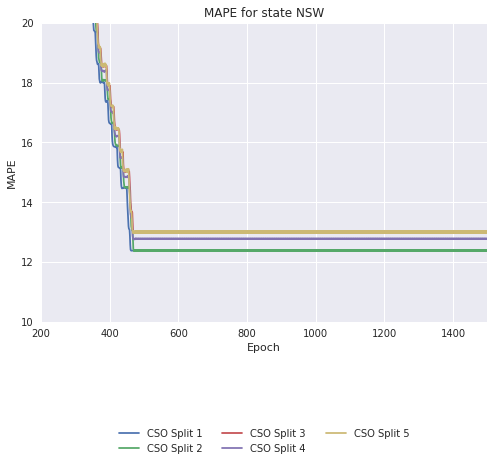

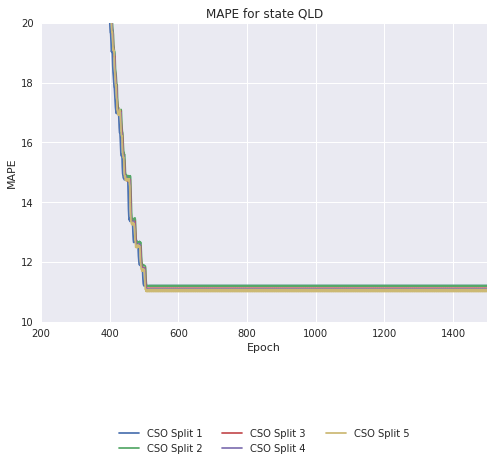

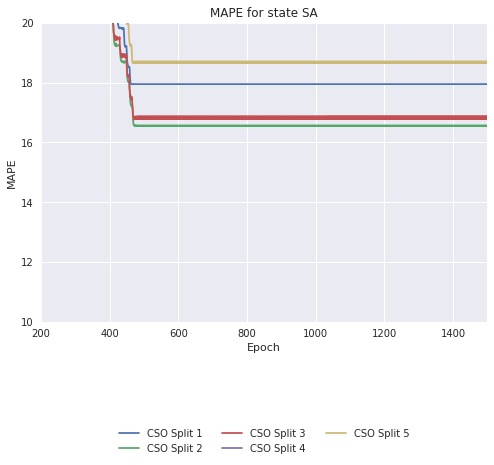

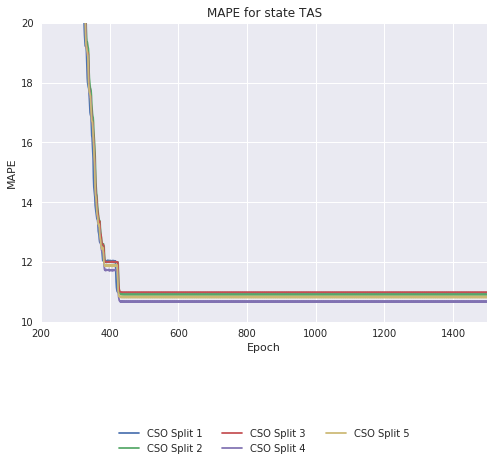

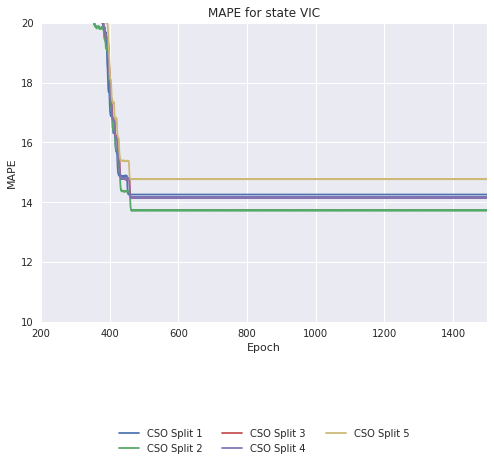

In [0]:
plot()